In [49]:
pip install vaderSentiment

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 3.7 MB/s eta 0:00:00


In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import nltk

from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm
#from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
#from sklearn.model_selection import train_test_split
#from sklearn.metrics import accuracy_score,classification_report
#from sklearn.discriminant_analysis import LinearDiscriminantAnalysis




In [52]:
nltk.downloader.download('vader_lexicon')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


True

In [109]:
sia = SentimentIntensityAnalyzer()

In [110]:
sia.polarity_scores('I am not  unhappy!')

{'neg': 0.0, 'neu': 0.533, 'pos': 0.467, 'compound': 0.3867}

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
!unzip /content/drive/MyDrive/data.zip

In [111]:
df = pd.read_csv('/content/Reviews.csv')
df.head()
#decrease size for time

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [112]:
df=df.head(300)
df['Text']

0      I have bought several of the Vitality canned d...
1      Product arrived labeled as Jumbo Salted Peanut...
2      This is a confection that has been around a fe...
3      If you are looking for the secret ingredient i...
4      Great taffy at a great price.  There was a wid...
                             ...                        
295    I've been feeling extremely tired around the l...
296    The energy shot truly does work! It had a terr...
297    I've tried 5-hour energy, red rain, NOS, and o...
298    If you're looking for an energy boost without ...
299    I first found Steaz Berry Energy Shots at a lo...
Name: Text, Length: 300, dtype: object

In [113]:
rev = df['Text'].values[0]
rev

'I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.'

In [114]:
sia.polarity_scores(df['Text'].values[0])


{'neg': 0.0, 'neu': 0.711, 'pos': 0.289, 'compound': 0.9441}

Text(0.5, 0, 'No. of stars')

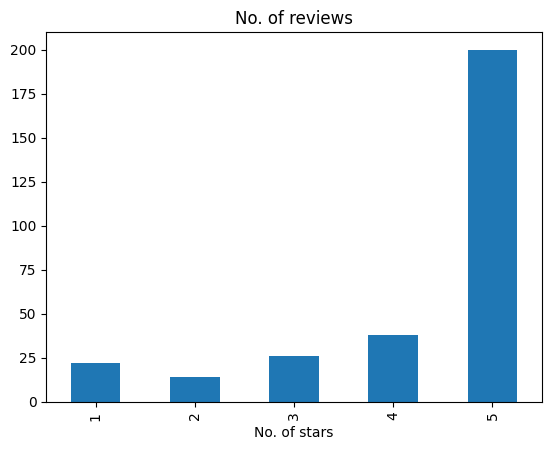

In [115]:
ax = df['Score'].value_counts().sort_index().plot(kind='bar',
                                                 title='No. of reviews',
                                                 )
ax.set_xlabel('No. of stars')

In [116]:
tokens = nltk.word_tokenize(rev)
tokens[:15]

['I',
 'have',
 'bought',
 'several',
 'of',
 'the',
 'Vitality',
 'canned',
 'dog',
 'food',
 'products',
 'and',
 'have',
 'found',
 'them']

In [117]:
tags = nltk.pos_tag(tokens)
tags

[('I', 'PRP'),
 ('have', 'VBP'),
 ('bought', 'VBN'),
 ('several', 'JJ'),
 ('of', 'IN'),
 ('the', 'DT'),
 ('Vitality', 'NNP'),
 ('canned', 'VBD'),
 ('dog', 'RP'),
 ('food', 'NN'),
 ('products', 'NNS'),
 ('and', 'CC'),
 ('have', 'VBP'),
 ('found', 'VBN'),
 ('them', 'PRP'),
 ('all', 'DT'),
 ('to', 'TO'),
 ('be', 'VB'),
 ('of', 'IN'),
 ('good', 'JJ'),
 ('quality', 'NN'),
 ('.', '.'),
 ('The', 'DT'),
 ('product', 'NN'),
 ('looks', 'VBZ'),
 ('more', 'RBR'),
 ('like', 'IN'),
 ('a', 'DT'),
 ('stew', 'NN'),
 ('than', 'IN'),
 ('a', 'DT'),
 ('processed', 'JJ'),
 ('meat', 'NN'),
 ('and', 'CC'),
 ('it', 'PRP'),
 ('smells', 'VBZ'),
 ('better', 'RBR'),
 ('.', '.'),
 ('My', 'PRP$'),
 ('Labrador', 'NNP'),
 ('is', 'VBZ'),
 ('finicky', 'JJ'),
 ('and', 'CC'),
 ('she', 'PRP'),
 ('appreciates', 'VBZ'),
 ('this', 'DT'),
 ('product', 'NN'),
 ('better', 'JJR'),
 ('than', 'IN'),
 ('most', 'JJS'),
 ('.', '.')]

In [118]:
ent = nltk.chunk.ne_chunk(tags)
ent.pprint()

(S
  I/PRP
  have/VBP
  bought/VBN
  several/JJ
  of/IN
  the/DT
  (ORGANIZATION Vitality/NNP)
  canned/VBD
  dog/RP
  food/NN
  products/NNS
  and/CC
  have/VBP
  found/VBN
  them/PRP
  all/DT
  to/TO
  be/VB
  of/IN
  good/JJ
  quality/NN
  ./.
  The/DT
  product/NN
  looks/VBZ
  more/RBR
  like/IN
  a/DT
  stew/NN
  than/IN
  a/DT
  processed/JJ
  meat/NN
  and/CC
  it/PRP
  smells/VBZ
  better/RBR
  ./.
  My/PRP$
  (ORGANIZATION Labrador/NNP)
  is/VBZ
  finicky/JJ
  and/CC
  she/PRP
  appreciates/VBZ
  this/DT
  product/NN
  better/JJR
  than/IN
  most/JJS
  ./.)


In [56]:
dic = {}
for i, row in tqdm(df.iterrows(), total = len(df)):
    txt = row['Text']
    id = row['Id']
    dic[id] = sia.polarity_scores(txt)

  0%|          | 0/300 [00:00<?, ?it/s]

In [ ]:
dic

In [59]:
v_res = pd.DataFrame(dic).T
v_res

,neg,neu,pos,compound
1,0.000,0.695,0.305,0.9441
2,0.138,0.862,0.000,-0.5664
3,0.091,0.754,0.155,0.8265
4,0.000,1.000,0.000,0.0000
5,0.000,0.552,0.448,0.9468
...,...,...,...,...
296,0.120,0.781,0.099,-0.7095
297,0.025,0.737,0.239,0.9566
298,0.000,0.811,0.189,0.8781
299,0.000,0.681,0.319,0.8934


In [60]:
v_res = v_res.reset_index().rename(columns = {'index' : 'Id'})
v_res = v_res.merge(df, how = 'left')

In [120]:
v_res

{'neg': 0.078, 'neu': 0.735, 'pos': 0.187, 'compound': 0.9637}

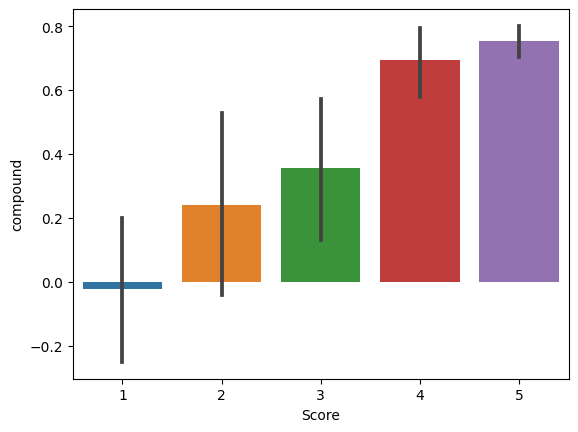

In [63]:
sns.barplot(data=v_res, x = 'Score' , y='compound')
plt.show()

<Axes: xlabel='Score', ylabel='pos'>

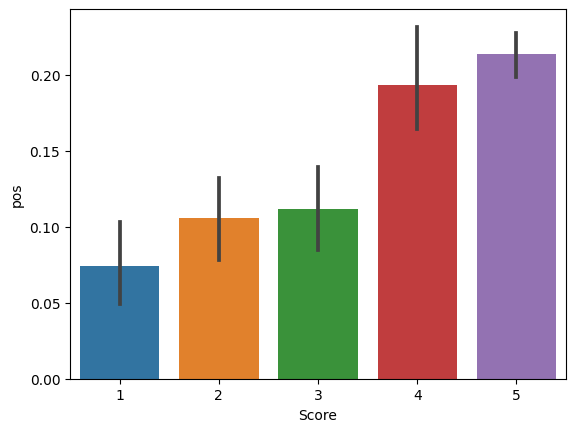

In [64]:
sns.barplot(data=v_res, x='Score', y='pos')

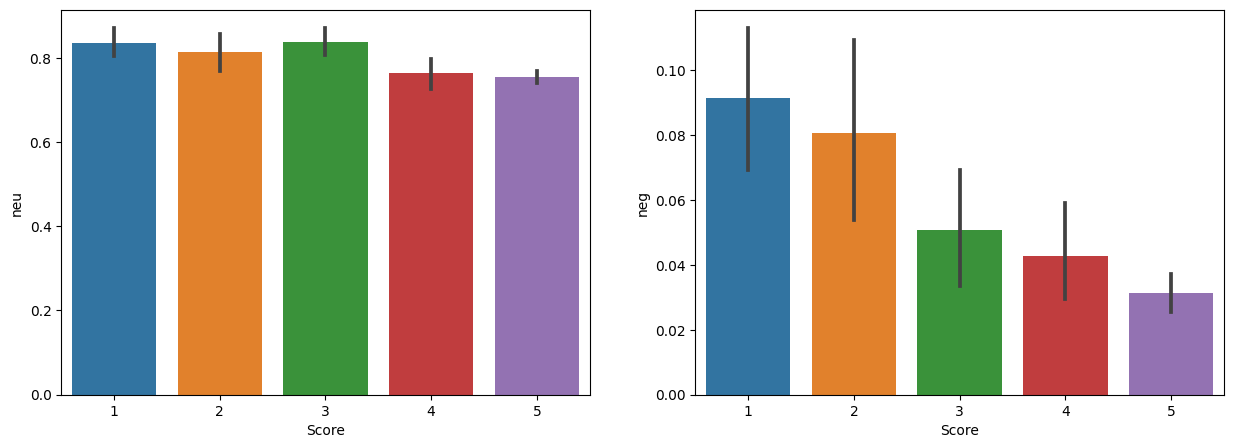

In [72]:
fig, axs = plt.subplots(1,2,figsize=(15,5))
sns.barplot(data=v_res, x='Score', y='neu', ax=axs[0])
sns.barplot(data=v_res, x='Score', y='neg', ax=axs[1])
plt.show()

In [ ]:
!pip install transformers

In [75]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [79]:
mod = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(mod)
model = AutoModelForSequenceClassification.from_pretrained(mod)

In [84]:
enc = tokenizer(rev, return_tensors='pt')
output = model(**enc)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores_dict = {
    'r_neg' : scores[0],
    'r_neu' : scores[1],
    'r_pos' : scores[2]
}
scores_dict

{'r_neg': 0.009624231, 'r_neu': 0.049980387, 'r_pos': 0.94039536}

In [86]:
def roberta_pol_scores(rev):
  enc = tokenizer(rev, return_tensors='pt')
  output = model(**enc)
  scores = output[0][0].detach().numpy()
  scores = softmax(scores)
  scores_dict = {
      'r_neg' : scores[0],
      'r_neu' : scores[1],
      'r_pos' : scores[2]
  }
  return scores_dict


In [93]:
dic = {}
for i, row in tqdm(df.iterrows(), total = len(df)):
    try:
        txt = row['Text']
        id = row['Id']
        v_res = sia.polarity_scores(txt)
        v_res_new = {}
        for k,val in v_res.items():
          v_res_new[f"v_{k}"] = val
        r_res = roberta_pol_scores(txt)
        both={**v_res_new,**r_res}
        dic[id] = both
    except:
        a=5


  0%|          | 0/300 [00:00<?, ?it/s]

In [95]:
res_df = pd.DataFrame(dic).T
res_df = res_df.reset_index().rename(columns={'index':'Id'})
res_df = res_df.merge(df, how='left')

In [ ]:
res_df.head()

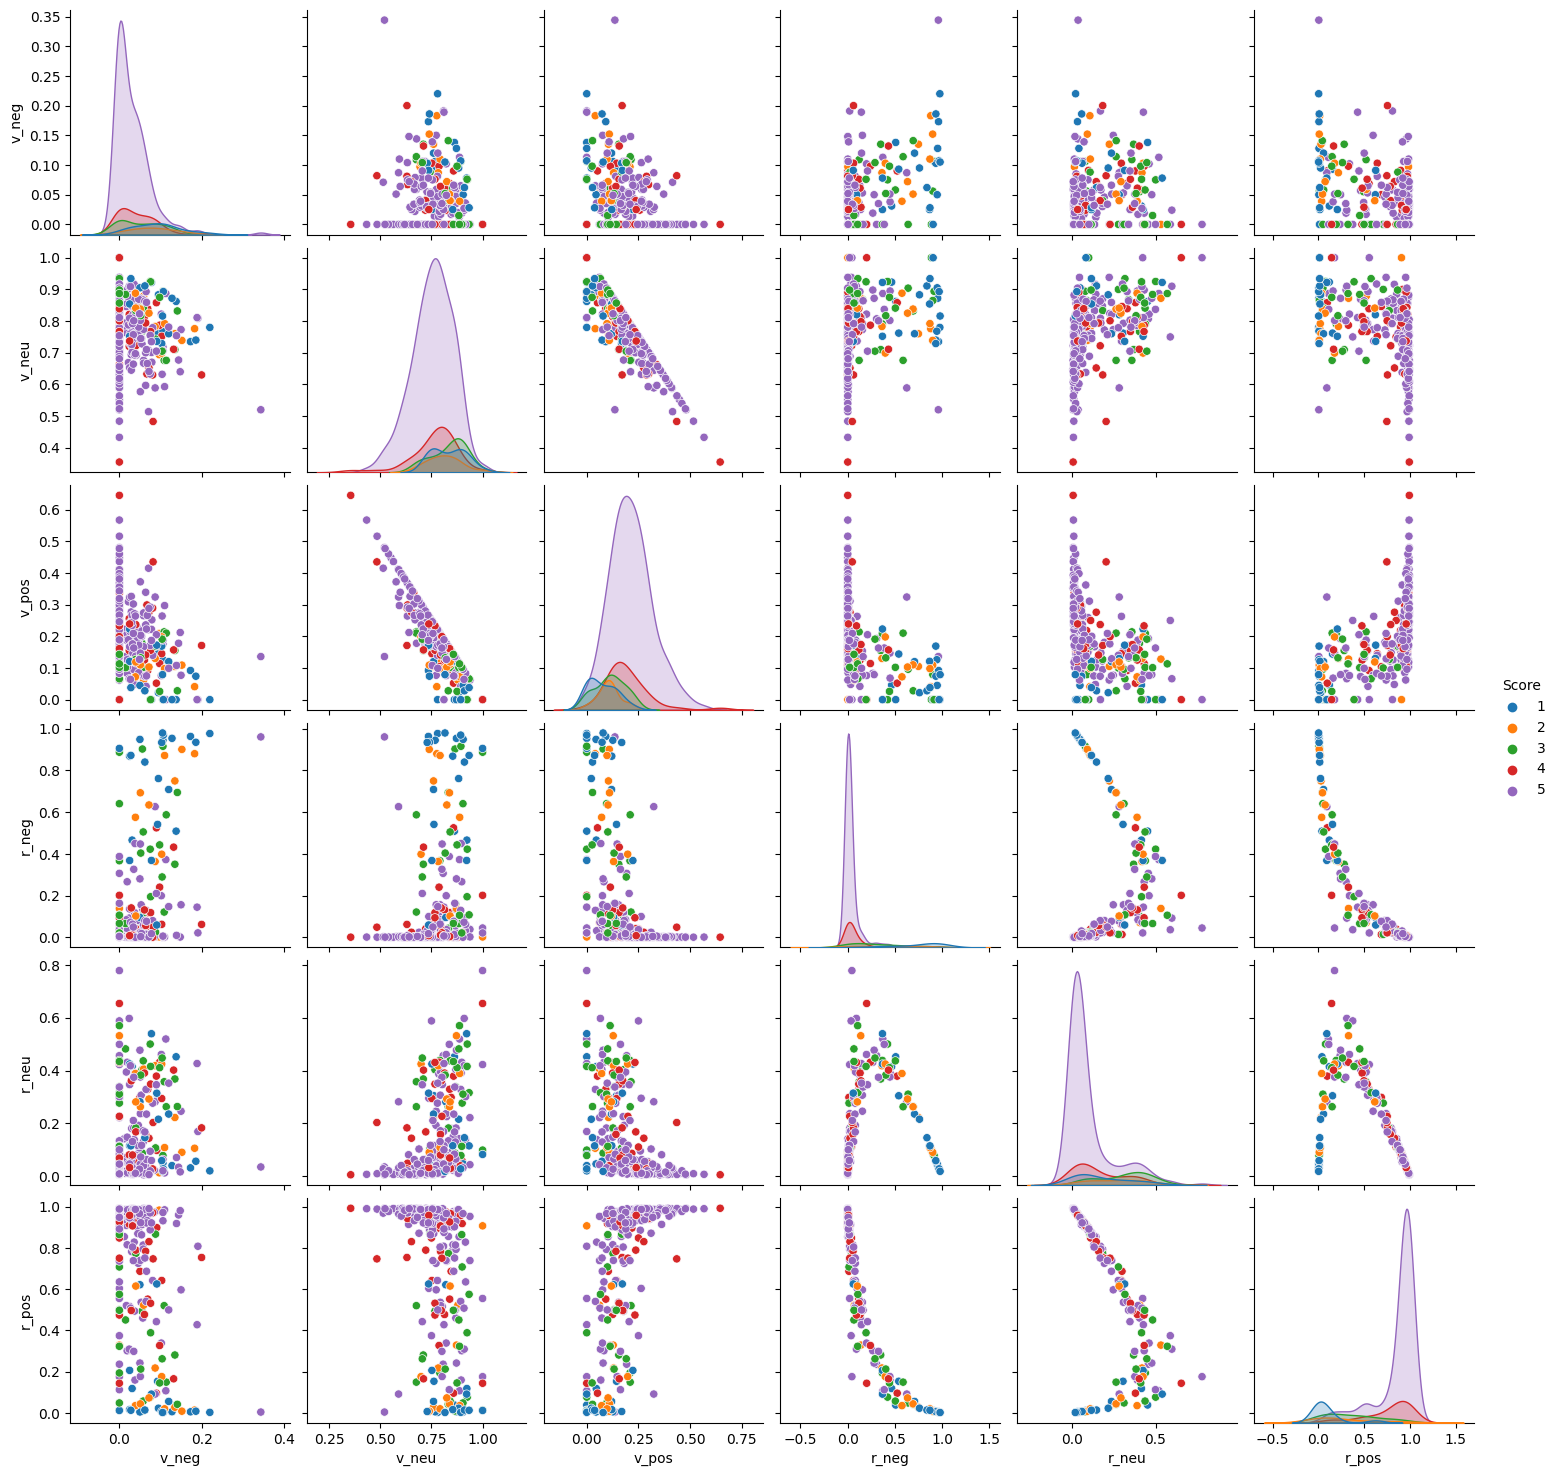

In [103]:
sns.pairplot(data=res_df,
             vars=['v_neg', 'v_neu', 'v_pos',
                    'r_neg', 'r_neu', 'r_pos'],
             hue='Score',
             palette='tab10')
plt.show()

In [107]:
res_df.query('Score==1').sort_values('r_pos',ascending=False)['Text'].values[0]

'I felt energized within five minutes, but it lasted for about 45 minutes. I paid $3.99 for this drink. I could have just drunk a cup of coffee and saved my money.'

In [108]:
res_df.query('Score==1').sort_values('v_pos',ascending=False)['Text'].values[0]

'Seriously this product was as tasteless as they come. There are much better tasting products out there but at 100 calories its better than a special k bar or cookie snack pack. You just have to season it or combine it with something else to share the flavor.'